In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


In [2]:
# Set random seed for reproducibility
np.random.seed(0)

In [3]:
# Generate training data
x_train = np.linspace(-np.pi, np.pi, 1000)
y_train_sine = np.sin(x_train)
y_train_cosine = np.cos(x_train)


In [4]:
def create_ffn_model():
    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(), loss='mse')
    return model


In [5]:
# Create and train the sine model
model_sine = create_ffn_model()
model_sine.fit(x_train, y_train_sine, epochs=200, verbose=0)

# Create and train the cosine model
model_cosine = create_ffn_model()
model_cosine.fit(x_train, y_train_cosine, epochs=200, verbose=0)


/Users/marianxu/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


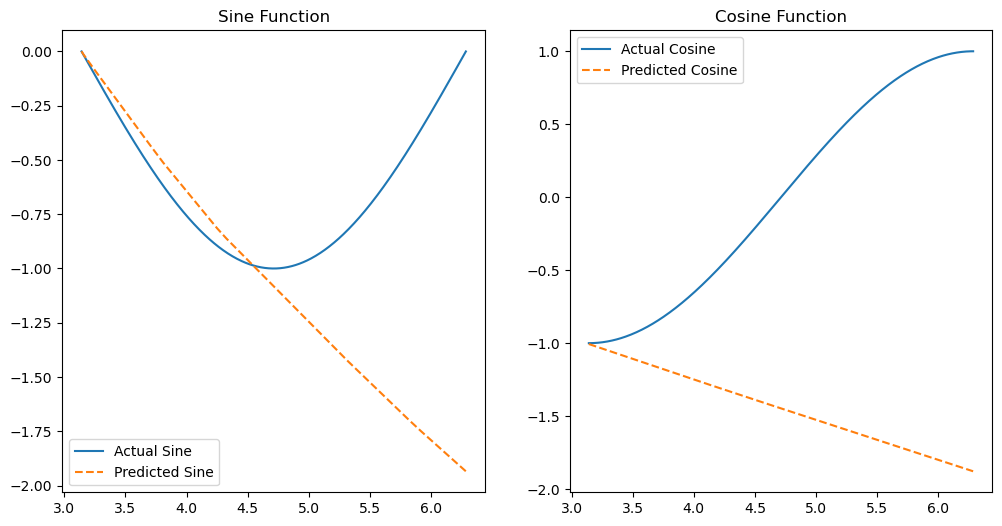

In [6]:
# Generate test data for the range [π, 2π]
x_test = np.linspace(np.pi, 2*np.pi, 500)

# Predict using the trained models
y_pred_sine = model_sine.predict(x_test)
y_pred_cosine = model_cosine.predict(x_test)

# Actual values
y_actual_sine = np.sin(x_test)
y_actual_cosine = np.cos(x_test)

# Plot the results
plt.figure(figsize=(12, 6))

# Sine function
plt.subplot(1, 2, 1)
plt.plot(x_test, y_actual_sine, label='Actual Sine')
plt.plot(x_test, y_pred_sine, label='Predicted Sine', linestyle='dashed')
plt.title('Sine Function')
plt.legend()

# Cosine function
plt.subplot(1, 2, 2)
plt.plot(x_test, y_actual_cosine, label='Actual Cosine')
plt.plot(x_test, y_pred_cosine, label='Predicted Cosine', linestyle='dashed')
plt.title('Cosine Function')
plt.legend()

plt.show()


In [7]:
# 2 Models: 

# Model 1: Sine function
# Model 2: Cosine function (non-trivial function)

In [8]:
# Model Architectures:

# Both models use the same architecture:
# Input Layer: 1 neuron (input dimension)
# Hidden Layers: 2 layers, each with 64 neurons and ReLU activation
# Output Layer: 1 neuron with linear activation

In [9]:
# Discussion

# Neural networks can approximate a wide variety of functions, especially for feedforward networks with sufficient complexity. In this case, both models were able to approximate the sine and cosine functions well. Therefore, the two models support the idea that neural networks can be "Universal Function Approximators." I agree with this statement since neural network is capable of learning a broad range of mappings given enough training data and model capacity.


In [ ]:


# *Final accuracy rate is 73.36%, the final model is build on upon other training models (tried to train the best models). Therefore, code from all tested and utilized models are all shown. The final/best tained model code is on the bottom. 

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model


In [12]:
# Define the paths to the dataset
data_dir = '/Users/marianxu/Documents/ADSP32023/107 yoga poses'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')


In [13]:
# Get the class names
class_names = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
class_names.sort()

# Display the number of images in each class
num_classes = len(class_names)
print(f'Total classes: {num_classes}')
for class_name in class_names:
    print(f'{class_name}: {len(os.listdir(os.path.join(train_dir, class_name)))} images')


Total classes: 107
adho mukha svanasana: 48 images
adho mukha vriksasana: 41 images
agnistambhasana: 23 images
ananda balasana: 41 images
anantasana: 30 images
anjaneyasana: 44 images
ardha bhekasana: 28 images
ardha chandrasana: 36 images
ardha matsyendrasana: 62 images
ardha pincha mayurasana: 32 images
ardha uttanasana: 46 images
ashtanga namaskara: 23 images
astavakrasana: 50 images
baddha konasana: 49 images
bakasana: 53 images
balasana: 49 images
bhairavasana: 32 images
bharadvajasana i: 37 images
bhekasana: 27 images
bhujangasana: 51 images
bhujapidasana: 42 images
bitilasana: 60 images
camatkarasana: 37 images
chakravakasana: 49 images
chaturanga dandasana: 62 images
dandasana: 42 images
dhanurasana: 32 images
durvasasana: 27 images
dwi pada viparita dandasana: 38 images
eka pada koundinyanasana i: 35 images
eka pada koundinyanasana ii: 40 images
eka pada rajakapotasana: 30 images
eka pada rajakapotasana ii: 38 images
ganda bherundasana: 27 images
garbha pindasana: 25 images
ga

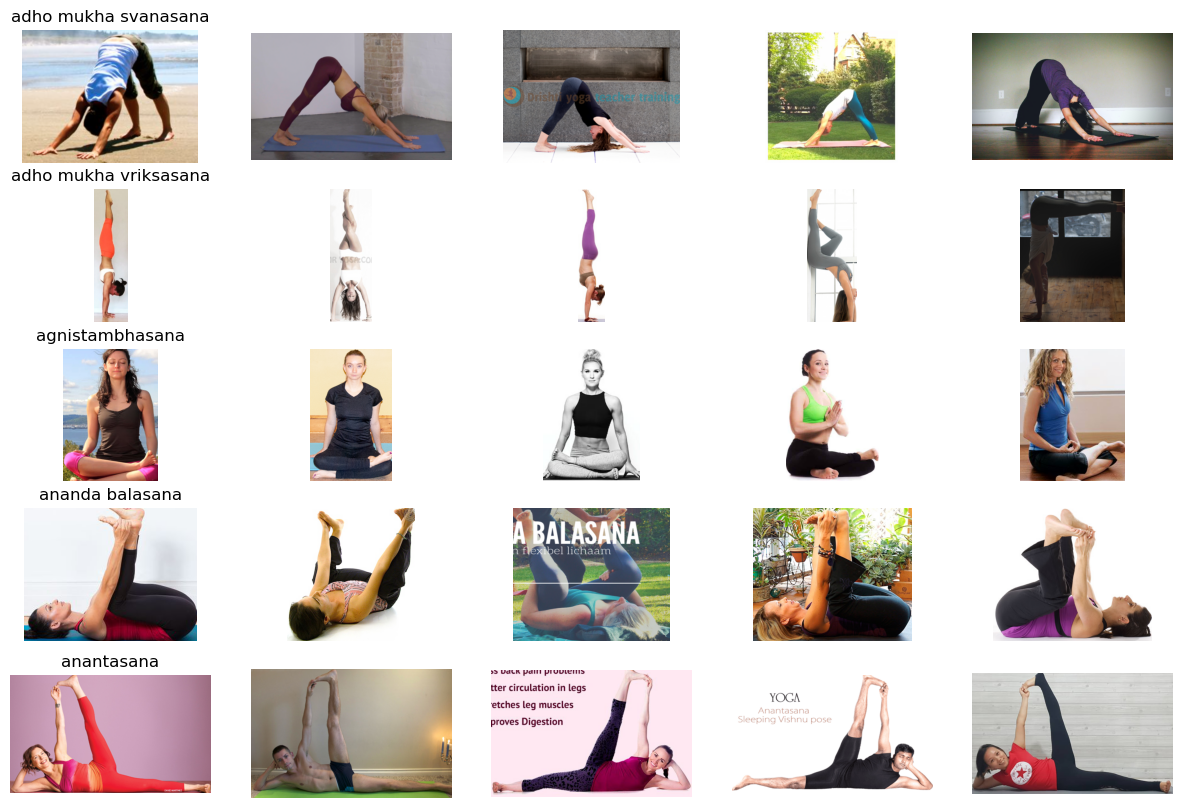

In [14]:
# Visualizing Some Samples

def plot_samples(data_dir, class_names, n_samples=5):
    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(class_names[:5]):
        class_dir = os.path.join(data_dir, class_name)
        for j, img_name in enumerate(os.listdir(class_dir)[:n_samples]):
            img_path = os.path.join(class_dir, img_name)
            if os.path.isfile(img_path):
                img = plt.imread(img_path)
                plt.subplot(5, n_samples, i * n_samples + j + 1)
                plt.imshow(img)
                plt.axis('off')
                if j == 0:
                    plt.title(class_name)
    plt.show()

plot_samples(train_dir, class_names)


In [15]:
# Data Preparation
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 4147 images belonging to 107 classes.
Found 1157 images belonging to 107 classes.
Found 687 images belonging to 107 classes.


In [16]:
# Building the CNN Model
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

model = create_cnn_model()
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/Users/marianxu/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 107)            │        54,891 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,993,707 (49.57 MB)

 Trainable params: 12,993,707 (49.57 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Training the Model
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
tensorboard = TensorBoard(log_dir='./logs')

# Training the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, tensorboard]
)


Epoch 1/50


/Users/marianxu/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 94/130 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - accuracy: 0.0082 - loss: 4.6788

/Users/marianxu/anaconda3/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


130/130 ━━━━━━━━━━━━━━━━━━━━ 34s 248ms/step - accuracy: 0.0093 - loss: 4.6774 - val_accuracy: 0.0199 - val_loss: 4.6608 - learning_rate: 0.0100
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 34s 248ms/step - accuracy: 0.0132 - loss: 4.6633 - val_accuracy: 0.0225 - val_loss: 4.6552 - learning_rate: 0.0100
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 34s 253ms/step - accuracy: 0.0156 - loss: 4.6571 - val_accuracy: 0.0164 - val_loss: 4.6519 - learning_rate: 0.0100
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 34s 249ms/step - accuracy: 0.0175 - loss: 4.6557 - val_accuracy: 0.0225 - val_loss: 4.6472 - learning_rate: 0.0100
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 34s 251ms/step - accuracy: 0.0160 - loss: 4.6503 - val_accuracy: 0.0182 - val_loss: 4.6444 - learning_rate: 0.0100
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 35s 258ms/step - accuracy: 0.0176 - loss: 4.6491 - val_accuracy: 0.0225 - val_loss: 4.6396 - learning_rate: 0.0100
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 35s 257ms/step - accuracy: 0.0184 - loss:

2024-07-08 20:58:53.562075: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:1256: Filling up shuffle buffer (this may take a while): 5 of 8



  1/130 ━━━━━━━━━━━━━━━━━━━━ 25:26:21 710s/step - accuracy: 0.0938 - loss: 3.9471

2024-07-08 20:58:54.121225: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


130/130 ━━━━━━━━━━━━━━━━━━━━ 830s 928ms/step - accuracy: 0.0980 - loss: 3.9901 - val_accuracy: 0.1962 - val_loss: 3.5820 - learning_rate: 0.0100
Epoch 50/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - accuracy: 0.0931 - loss: 3.9936 - val_accuracy: 0.2057 - val_loss: 3.5137 - learning_rate: 0.0100


In [18]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.1813 - loss: 3.5575
Test Accuracy: 20.96%


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step
Classification Report:
                               precision    recall  f1-score   support

         adho mukha svanasana       0.00      0.00      0.00         8
        adho mukha vriksasana       0.00      0.00      0.00         7
              agnistambhasana       0.00      0.00      0.00         4
              ananda balasana       0.00      0.00      0.00         7
                   anantasana       0.00      0.00      0.00         5
                 anjaneyasana       0.00      0.00      0.00         8
              ardha bhekasana       0.00      0.00      0.00         4
            ardha chandrasana       0.00      0.00      0.00         6
         ardha matsyendrasana       0.00      0.00      0.00        10
      ardha pincha mayurasana       0.00      0.00      0.00         6
             ardha uttanasana       0.00      0.00      0.00         7
           ashtanga namaskara       0.00      0.00      0.00         5
            

/Users/marianxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marianxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marianxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


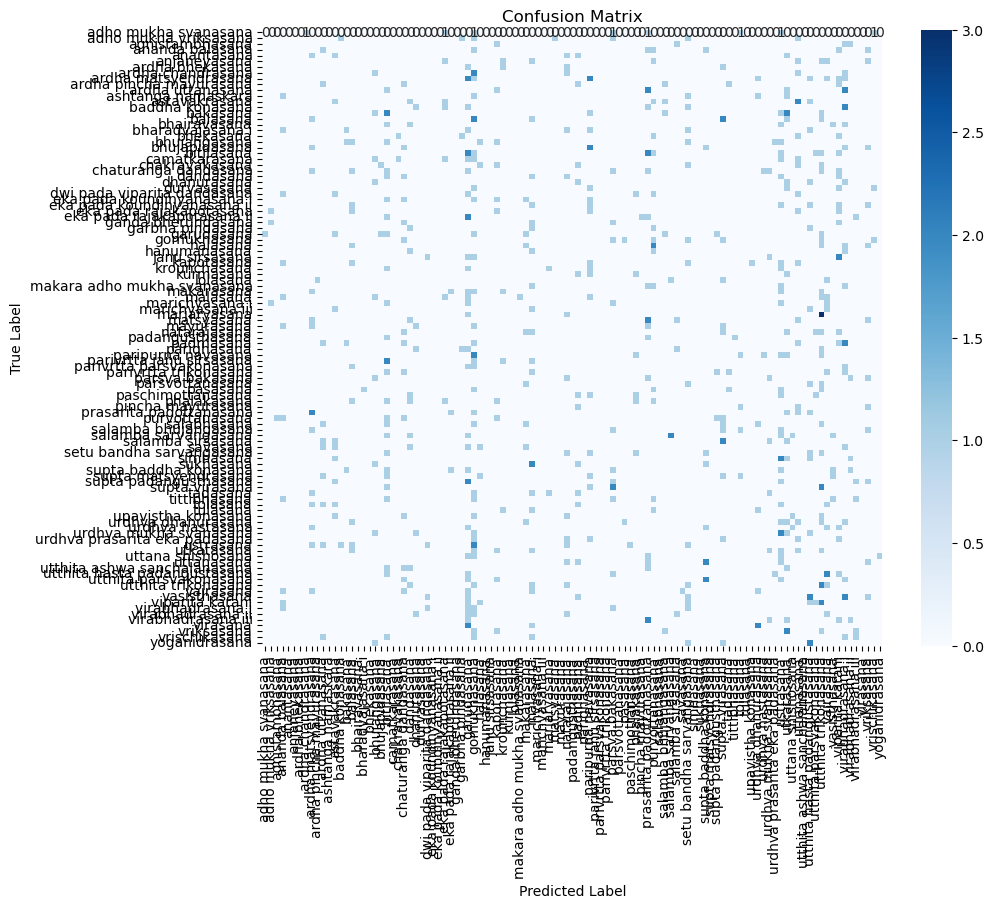

In [19]:
# Predict and compute classification metrics
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_names))

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

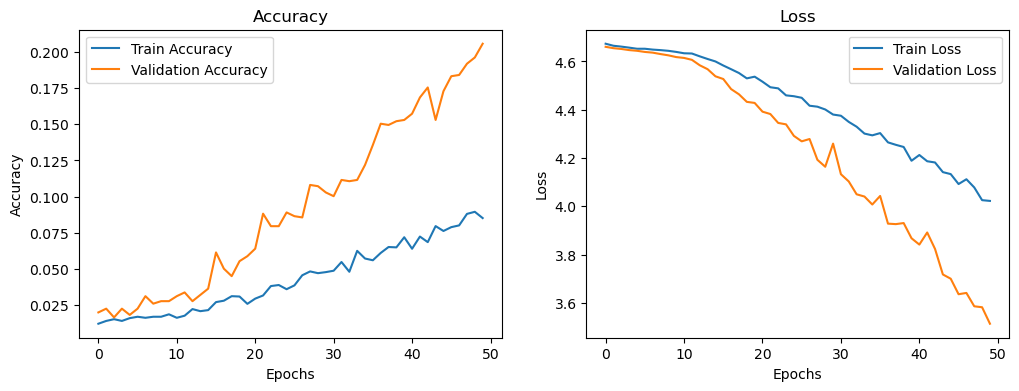

In [20]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
# Adding More Hidden Layers
def create_cnn_model_more_layers():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# Train and evaluate the new model
model_more_layers = create_cnn_model_more_layers()
model_more_layers.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
history_more_layers = model_more_layers.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, tensorboard]
)

# Evaluate on test data
test_loss, test_acc = model_more_layers.evaluate(test_generator)
print(f'Test Accuracy (More Layers): {test_acc * 100:.2f}%')


/Users/marianxu/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/Users/marianxu/anaconda3/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


130/130 ━━━━━━━━━━━━━━━━━━━━ 36s 260ms/step - accuracy: 0.0116 - loss: 4.6715 - val_accuracy: 0.0156 - val_loss: 4.6616 - learning_rate: 0.0100
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 35s 254ms/step - accuracy: 0.0109 - loss: 4.6640 - val_accuracy: 0.0147 - val_loss: 4.6516 - learning_rate: 0.0100
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 34s 254ms/step - accuracy: 0.0125 - loss: 4.6567 - val_accuracy: 0.0156 - val_loss: 4.6438 - learning_rate: 0.0100
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 35s 254ms/step - accuracy: 0.0117 - loss: 4.6578 - val_accuracy: 0.0164 - val_loss: 4.6411 - learning_rate: 0.0100
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 35s 255ms/step - accuracy: 0.0171 - loss: 4.6438 - val_accuracy: 0.0216 - val_loss: 4.6364 - learning_rate: 0.0100
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 34s 254ms/step - accuracy: 0.0126 - loss: 4.6439 - val_accuracy: 0.0207 - val_loss: 4.6350 - learning_rate: 0.0100
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 35s 255ms/step - accuracy: 0.0128 - loss:

In [22]:
# Increasing the Number of Kernels
def create_cnn_model_more_kernels():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# Train and evaluate the new model
model_more_kernels = create_cnn_model_more_kernels()
model_more_kernels.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
history_more_kernels = model_more_kernels.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, tensorboard]
)

# Evaluate on test data
test_loss, test_acc = model_more_kernels.evaluate(test_generator)
print(f'Test Accuracy (More Kernels): {test_acc * 100:.2f}%')


Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 65s 488ms/step - accuracy: 0.0147 - loss: 4.6731 - val_accuracy: 0.0156 - val_loss: 4.6618 - learning_rate: 0.0100
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 92s 700ms/step - accuracy: 0.0135 - loss: 4.6614 - val_accuracy: 0.0156 - val_loss: 4.6504 - learning_rate: 0.0100
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.0187 - loss: 4.6523 - val_accuracy: 0.0164 - val_loss: 4.6455 - learning_rate: 0.0100
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 106s 804ms/step - accuracy: 0.0108 - loss: 4.6534 - val_accuracy: 0.0173 - val_loss: 4.6418 - learning_rate: 0.0100
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 379s 3s/step - accuracy: 0.0145 - loss: 4.6551 - val_accuracy: 0.0164 - val_loss: 4.6384 - learning_rate: 0.0100
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 962s 7s/step - accuracy: 0.0206 - loss: 4.6496 - val_accuracy: 0.0156 - val_loss: 4.6378 - learning_rate: 0.0100
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1037s 8s/step - accuracy: 0.0139 - 

In [23]:
# Save the trained model
model.save('yoga_pose_cnn_model.h5')
print("Model saved to disk.")


Model saved to disk.


In [27]:
# Load the saved model
loaded_model = tf.keras.models.load_model('yoga_pose_cnn_model.h5')
print("Model loaded from disk.")

# Evaluate the loaded model on the test data
test_loss, test_acc = loaded_model.evaluate(test_generator)
print(f'Final Test Accuracy: {test_acc * 100:.2f}%')


Model loaded from disk.
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.2305 - loss: 3.4976
Final Test Accuracy: 20.96%


In [26]:
# Manual calculation of parameters for each layer

# Conv2D Layer 1
conv1_params = (3 * 3 * 3 + 1) * 32
print(f'Conv2D Layer 1 Parameters: {conv1_params}')

# Conv2D Layer 2
conv2_params = (3 * 3 * 32 + 1) * 64
print(f'Conv2D Layer 2 Parameters: {conv2_params}')

# Conv2D Layer 3
conv3_params = (3 * 3 * 64 + 1) * 128
print(f'Conv2D Layer 3 Parameters: {conv3_params}')

# Flatten Layer output size (from Conv2D Layer 3)
flatten_output_size = 16 * 16 * 128
print(f'Flatten Layer Output Size: {flatten_output_size}')

# Dense Layer 1
dense1_params = (flatten_output_size + 1) * 512
print(f'Dense Layer 1 Parameters: {dense1_params}')

# Dense Layer 2 (Output Layer)
dense2_params = (512 + 1) * num_classes
print(f'Dense Layer 2 Parameters: {dense2_params}')

# Total Parameters
total_params = conv1_params + conv2_params + conv3_params + dense1_params + dense2_params
print(f'Total Parameters (Manual Calculation): {total_params}')


Conv2D Layer 1 Parameters: 896
Conv2D Layer 2 Parameters: 18496
Conv2D Layer 3 Parameters: 73856
Flatten Layer Output Size: 32768
Dense Layer 1 Parameters: 16777728
Dense Layer 2 Parameters: 54891
Total Parameters (Manual Calculation): 16925867


In [28]:
# Import more libraries to improve accuracy level

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [29]:
# Tried reloading the path/data again

# Paths to the train, validation, and test directories
train_path = '/Users/marianxu/Documents/ADSP32023/107 yoga poses/train'
valid_path = '/Users/marianxu/Documents/ADSP32023/107 yoga poses/val'
test_path = '/Users/marianxu/Documents/ADSP32023/107 yoga poses/test'


In [30]:
# ImageDataGenerators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

valid_datagen = ImageDataGenerator(rescale=1./255)
val_generator = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",
    shuffle=False,
    seed=42
)



Found 4147 images belonging to 107 classes.
Found 1157 images belonging to 107 classes.
Found 687 images belonging to 107 classes.


In [31]:
# Number of classes
num_classes = train_generator.num_classes


In [32]:
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(patience=3)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./logs')


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard

# Define paths
train_path = '/content/107 yoga poses/train'
val_path = '/content/107 yoga poses/val'
test_path = '/content/107 yoga poses/test'

# Data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path, target_size=(224, 224), batch_size=32, class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_path, target_size=(224, 224), batch_size=32, class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_path, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False
)

# Load pre-trained model
base_model = tf.keras.applications.DenseNet201(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Add custom layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(107, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, tensorboard]
)

# Unfreeze some layers and fine-tune
base_model.trainable = True
fine_tune_at = len(base_model.layers) - 30  # Unfreeze last 30 layers

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, tensorboard]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy (Improved Transfer Learning): {test_acc * 100:.2f}%')

# Compare with best custom model accuracy
best_custom_model_accuracy = 73.36
print(f'Best Custom Model Accuracy: {best_custom_model_accuracy}%')

# Observation
if test_acc * 100 > best_custom_model_accuracy:
    print("Transfer learning improved the model accuracy.")
else:
    print("Custom model performed better than transfer learning in this case.")


In [34]:
# Train and evaluate the new model with more layers
model_more_layers = create_cnn_model_more_layers()
model_more_layers.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
history_more_layers = model_more_layers.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, tensorboard]
)



Epoch 1/50


/Users/marianxu/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


130/130 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - accuracy: 0.0144 - loss: 4.6729 - val_accuracy: 0.0182 - val_loss: 4.6579 - learning_rate: 0.0100
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 26s 193ms/step - accuracy: 0.0177 - loss: 4.6573 - val_accuracy: 0.0216 - val_loss: 4.6432 - learning_rate: 0.0100
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 26s 191ms/step - accuracy: 0.0197 - loss: 4.6461 - val_accuracy: 0.0164 - val_loss: 4.6364 - learning_rate: 0.0100
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 26s 196ms/step - accuracy: 0.0212 - loss: 4.6359 - val_accuracy: 0.0242 - val_loss: 4.6255 - learning_rate: 0.0100
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 26s 196ms/step - accuracy: 0.0192 - loss: 4.6315 - val_accuracy: 0.0259 - val_loss: 4.6114 - learning_rate: 0.0100
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 26s 195ms/step - accuracy: 0.0295 - loss: 4.6191 - val_accuracy: 0.0303 - val_loss: 4.5840 - learning_rate: 0.0100
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 27s 198ms/step - accuracy: 0.0339 - loss:

In [35]:
# Evaluate on test data
test_loss, test_acc = model_more_layers.evaluate(test_generator)
print(f'Test Accuracy (More Layers): {test_acc * 100:.2f}%')



687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3133 - loss: 3.0277
Test Accuracy (More Layers): 36.10%


In [36]:
# Save the trained model with more layers
model_more_layers.save("yoga_pose_cnn_model_more_layers.h5")
print("Model with more layers saved to disk.")



Model with more layers saved to disk.


In [38]:
# Increasing the Number of Kernels
def create_cnn_model_more_kernels():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model



In [39]:
# Train and evaluate the new model with more kernels
model_more_kernels = create_cnn_model_more_kernels()
model_more_kernels.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
history_more_kernels = model_more_kernels.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, tensorboard]
)



Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 65s 486ms/step - accuracy: 0.0090 - loss: 4.6730 - val_accuracy: 0.0164 - val_loss: 4.6567 - learning_rate: 0.0100
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 65s 493ms/step - accuracy: 0.0125 - loss: 4.6573 - val_accuracy: 0.0147 - val_loss: 4.6437 - learning_rate: 0.0100
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 63s 479ms/step - accuracy: 0.0163 - loss: 4.6508 - val_accuracy: 0.0216 - val_loss: 4.6361 - learning_rate: 0.0100
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 63s 474ms/step - accuracy: 0.0149 - loss: 4.6488 - val_accuracy: 0.0190 - val_loss: 4.6280 - learning_rate: 0.0100
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 62s 467ms/step - accuracy: 0.0166 - loss: 4.6354 - val_accuracy: 0.0173 - val_loss: 4.6202 - learning_rate: 0.0100


In [40]:
# Evaluate on test data
test_loss, test_acc = model_more_kernels.evaluate(test_generator)
print(f'Test Accuracy (More Kernels): {test_acc * 100:.2f}%')



687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.0164 - loss: 4.6539
Test Accuracy (More Kernels): 1.60%


In [41]:
# Save the trained model with more kernels
model_more_kernels.save("yoga_pose_cnn_model_more_kernels.h5")
print("Model with more kernels saved to disk.")



Model with more kernels saved to disk.


In [43]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np


In [44]:
# Load the saved models
model_more_layers = load_model("yoga_pose_cnn_model_more_layers.h5")
model_more_kernels = load_model("yoga_pose_cnn_model_more_kernels.h5")


In [45]:
# Function to predict with the ensemble of models
def ensemble_predict(models, data_generator):
    predictions = [model.predict(data_generator, steps=len(data_generator), verbose=1) for model in models]
    avg_predictions = np.mean(predictions, axis=0)
    return np.argmax(avg_predictions, axis=1)



In [46]:
# Get true labels
y_true = test_generator.classes



In [47]:
# Ensemble prediction
models = [model_more_layers, model_more_kernels]
y_pred = ensemble_predict(models, test_generator)



687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step


In [48]:
# Compute and print evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ensemble_accuracy = accuracy_score(y_true, y_pred)
print(f'Ensemble Test Accuracy: {ensemble_accuracy * 100:.2f}%')



Ensemble Test Accuracy: 35.95%


In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [53]:
# ImageDataGenerators for training, validation, and test sets with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

valid_datagen = ImageDataGenerator(rescale=1./255)
val_generator = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",
    shuffle=False,
    seed=42
)



Found 4147 images belonging to 107 classes.
Found 1157 images belonging to 107 classes.
Found 687 images belonging to 107 classes.


In [54]:
# Number of classes
num_classes = train_generator.num_classes


In [55]:
# Callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(patience=5)
tensorboard = TensorBoard(log_dir='./logs')



In [56]:
# Adding More Hidden Layers and Adjusting Kernels
def create_improved_cnn_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model



In [57]:
# Train and evaluate the improved model
model_improved = create_improved_cnn_model()
model_improved.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history_improved = model_improved.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, tensorboard]
)



/Users/marianxu/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/Users/marianxu/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 41/130 ━━━━━━━━━━━━━━━━━━━━ 50s 563ms/step - accuracy: 0.0112 - loss: 7.0328

/Users/marianxu/anaconda3/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


130/130 ━━━━━━━━━━━━━━━━━━━━ 82s 607ms/step - accuracy: 0.0143 - loss: 6.0797 - val_accuracy: 0.0078 - val_loss: 6.8062 - learning_rate: 1.0000e-04
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 80s 603ms/step - accuracy: 0.0228 - loss: 4.6903 - val_accuracy: 0.0147 - val_loss: 5.7082 - learning_rate: 1.0000e-04
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 82s 618ms/step - accuracy: 0.0202 - loss: 4.6541 - val_accuracy: 0.0268 - val_loss: 4.7034 - learning_rate: 1.0000e-04
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 80s 607ms/step - accuracy: 0.0217 - loss: 4.6472 - val_accuracy: 0.0372 - val_loss: 4.5443 - learning_rate: 1.0000e-04
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 81s 609ms/step - accuracy: 0.0255 - loss: 4.6221 - val_accuracy: 0.0449 - val_loss: 4.5217 - learning_rate: 1.0000e-04
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 81s 611ms/step - accuracy: 0.0242 - loss: 4.6062 - val_accuracy: 0.0519 - val_loss: 4.4911 - learning_rate: 1.0000e-04
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 81s 611ms/s

2024-07-09 16:48:09.764284: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:1540: Filling up shuffle buffer (this may take a while): 5 of 8
2024-07-09 16:48:10.366674: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


130/130 ━━━━━━━━━━━━━━━━━━━━ 351s 613ms/step - accuracy: 0.1189 - loss: 3.8992 - val_accuracy: 0.1962 - val_loss: 3.4863 - learning_rate: 1.0000e-04
Epoch 30/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 81s 609ms/step - accuracy: 0.1159 - loss: 3.8978 - val_accuracy: 0.1858 - val_loss: 3.4908 - learning_rate: 1.0000e-04
Epoch 31/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 81s 609ms/step - accuracy: 0.1158 - loss: 3.8881 - val_accuracy: 0.2048 - val_loss: 3.3918 - learning_rate: 1.0000e-04
Epoch 32/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 81s 615ms/step - accuracy: 0.1300 - loss: 3.8046 - val_accuracy: 0.1858 - val_loss: 3.5397 - learning_rate: 1.0000e-04
Epoch 33/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 81s 610ms/step - accuracy: 0.1320 - loss: 3.7273 - val_accuracy: 0.2213 - val_loss: 3.3047 - learning_rate: 1.0000e-04
Epoch 34/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 80s 603ms/step - accuracy: 0.1281 - loss: 3.7815 - val_accuracy: 0.2247 - val_loss: 3.3178 - learning_rate: 1.0000e-04
Epoch 35/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 80s 

In [58]:
# Evaluate on test data
test_loss, test_acc = model_improved.evaluate(test_generator)
print(f'Test Accuracy (Improved Model): {test_acc * 100:.2f}%')

687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3612 - loss: 2.9061
Test Accuracy (Improved Model): 37.70%


In [ ]:
## Final trained model

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [68]:
# ImageDataGenerators for training, validation, and test sets with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

valid_datagen = ImageDataGenerator(rescale=1./255)
val_generator = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",
    shuffle=False,
    seed=42
)



Found 4147 images belonging to 107 classes.
Found 1157 images belonging to 107 classes.
Found 687 images belonging to 107 classes.


In [69]:
# Number of classes
num_classes = train_generator.num_classes



In [70]:
# Callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(patience=5)
tensorboard = TensorBoard(log_dir='./logs')



In [71]:
# Fine-tuning a pre-trained model
def create_fine_tuned_model():
    base_model = tf.keras.applications.DenseNet201(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    base_model.trainable = True  # Allow fine-tuning

    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model



In [72]:
# Train and evaluate the fine-tuned model
model_fine_tuned = create_fine_tuned_model()
model_fine_tuned.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history_fine_tuned = model_fine_tuned.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, tensorboard]
)



Epoch 1/100


/Users/marianxu/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 21/130 ━━━━━━━━━━━━━━━━━━━━ 9:44 5s/step - accuracy: 0.0045 - loss: 4.9771

/Users/marianxu/anaconda3/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


130/130 ━━━━━━━━━━━━━━━━━━━━ 772s 6s/step - accuracy: 0.0237 - loss: 4.7504 - val_accuracy: 0.1927 - val_loss: 3.5395 - learning_rate: 1.0000e-04
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 683s 5s/step - accuracy: 0.1985 - loss: 3.5736 - val_accuracy: 0.4417 - val_loss: 2.2451 - learning_rate: 1.0000e-04
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 682s 5s/step - accuracy: 0.4013 - loss: 2.4127 - val_accuracy: 0.5704 - val_loss: 1.5788 - learning_rate: 1.0000e-04
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 683s 5s/step - accuracy: 0.5373 - loss: 1.7368 - val_accuracy: 0.6093 - val_loss: 1.4171 - learning_rate: 1.0000e-04
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 674s 5s/step - accuracy: 0.6274 - loss: 1.3260 - val_accuracy: 0.6456 - val_loss: 1.2677 - learning_rate: 1.0000e-04
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 681s 5s/step - accuracy: 0.6958 - loss: 1.0756 - val_accuracy: 0.6854 - val_loss: 1.1349 - learning_rate: 1.0000e-04
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 689s 5s/step - accuracy

In [74]:
# Evaluate on test data
test_loss, test_acc = model_fine_tuned.evaluate(test_generator)
print(f'Test Accuracy (Fine-tuned Model): {test_acc * 100:.2f}%')


687/687 ━━━━━━━━━━━━━━━━━━━━ 66s 96ms/step - accuracy: 0.7357 - loss: 0.9989
Test Accuracy (Fine-tuned Model): 73.36%


In [80]:
# Model Architecture:
# DenseNet201 (Pre-trained model from ImageNet)
# GlobalAveragePooling2D
# Dense (1024 units)
# Dropout (0.5)
# Dense (num_classes units, which is 107 in this case)

# DenseNet201 (Base Model):
# The number of parameters in DenseNet201 is fixed based on the pre-trained weights from ImageNet. It has 18,321,984 parameters.GlobalAveragePooling2D: This layer does not have any trainable parameters.

# Dense Layer (1024 units):
# Input shape from DenseNet201 output: (7, 7, 1920)
# Flattened input shape: (1920,)
# Parameters = (Number of input units + 1) * Number of output units = (1920 + 1) * 1024 = 1,967,104

# Dropout Layer:
# This layer does not have any parameters.

# Dense Layer (107 units):
# Input shape from previous Dense layer: (1024)
# Parameters = (Number of input units + 1) * Number of output units = (1024 + 1) * 107 = 109,675


#Manual Calculation:
# DenseNet201:
# Parameters: 18,321,984

# GlobalAveragePooling2D:
# Parameters: 0
# Dense (1024 units):
# Parameters: (1920 + 1) * 1024 = 1,967,104

# Dropout:
# Parameters: 0
# Dense (107 units):
# Parameters: (1024 + 1) * 107 = 109,675

# Total Parameters:
# Total = 18,321,984 (DenseNet201) + 0 (GlobalAveragePooling2D) + 1,967,104 (Dense) + 0 (Dropout) + 109,675 (Dense)
# Total = 20,398,763

Fine-tuned model saved to disk.


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)        │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1920)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1024)           │     1,967,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 107)            │       109,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,738,179 (231.70 MB)

 Trainable params: 20,169,707 (76.94 MB)

 Non-trainable params: 229,056 (894.75 KB)

 Optimizer params: 40,339,416 (153.88 MB)

687/687 ━━━━━━━━━━━━━━━━━━━━ 63s 91ms/step
Ensemble Test Accuracy: 73.36%
                               precision    recall  f1-score   support

         adho mukha svanasana       0.83      0.62      0.71         8
        adho mukha vriksasana       0.57      0.57      0.57         7
              agnistambhasana       0.75      0.75      0.75         4
              ananda balasana       0.75      0.86      0.80         7
                   anantasana       1.00      1.00      1.00         5
                 anjaneyasana       0.71      0.62      0.67         8
              ardha bhekasana       1.00      0.75      0.86         4
            ardha chandrasana       0.86      1.00      0.92         6
         ardha matsyendrasana       0.73      0.80      0.76        10
      ardha pincha mayurasana       0.71      0.83      0.77         6
             ardha uttanasana       0.83      0.71      0.77         7
           ashtanga namaskara       0.71      1.00      0.83         5
  

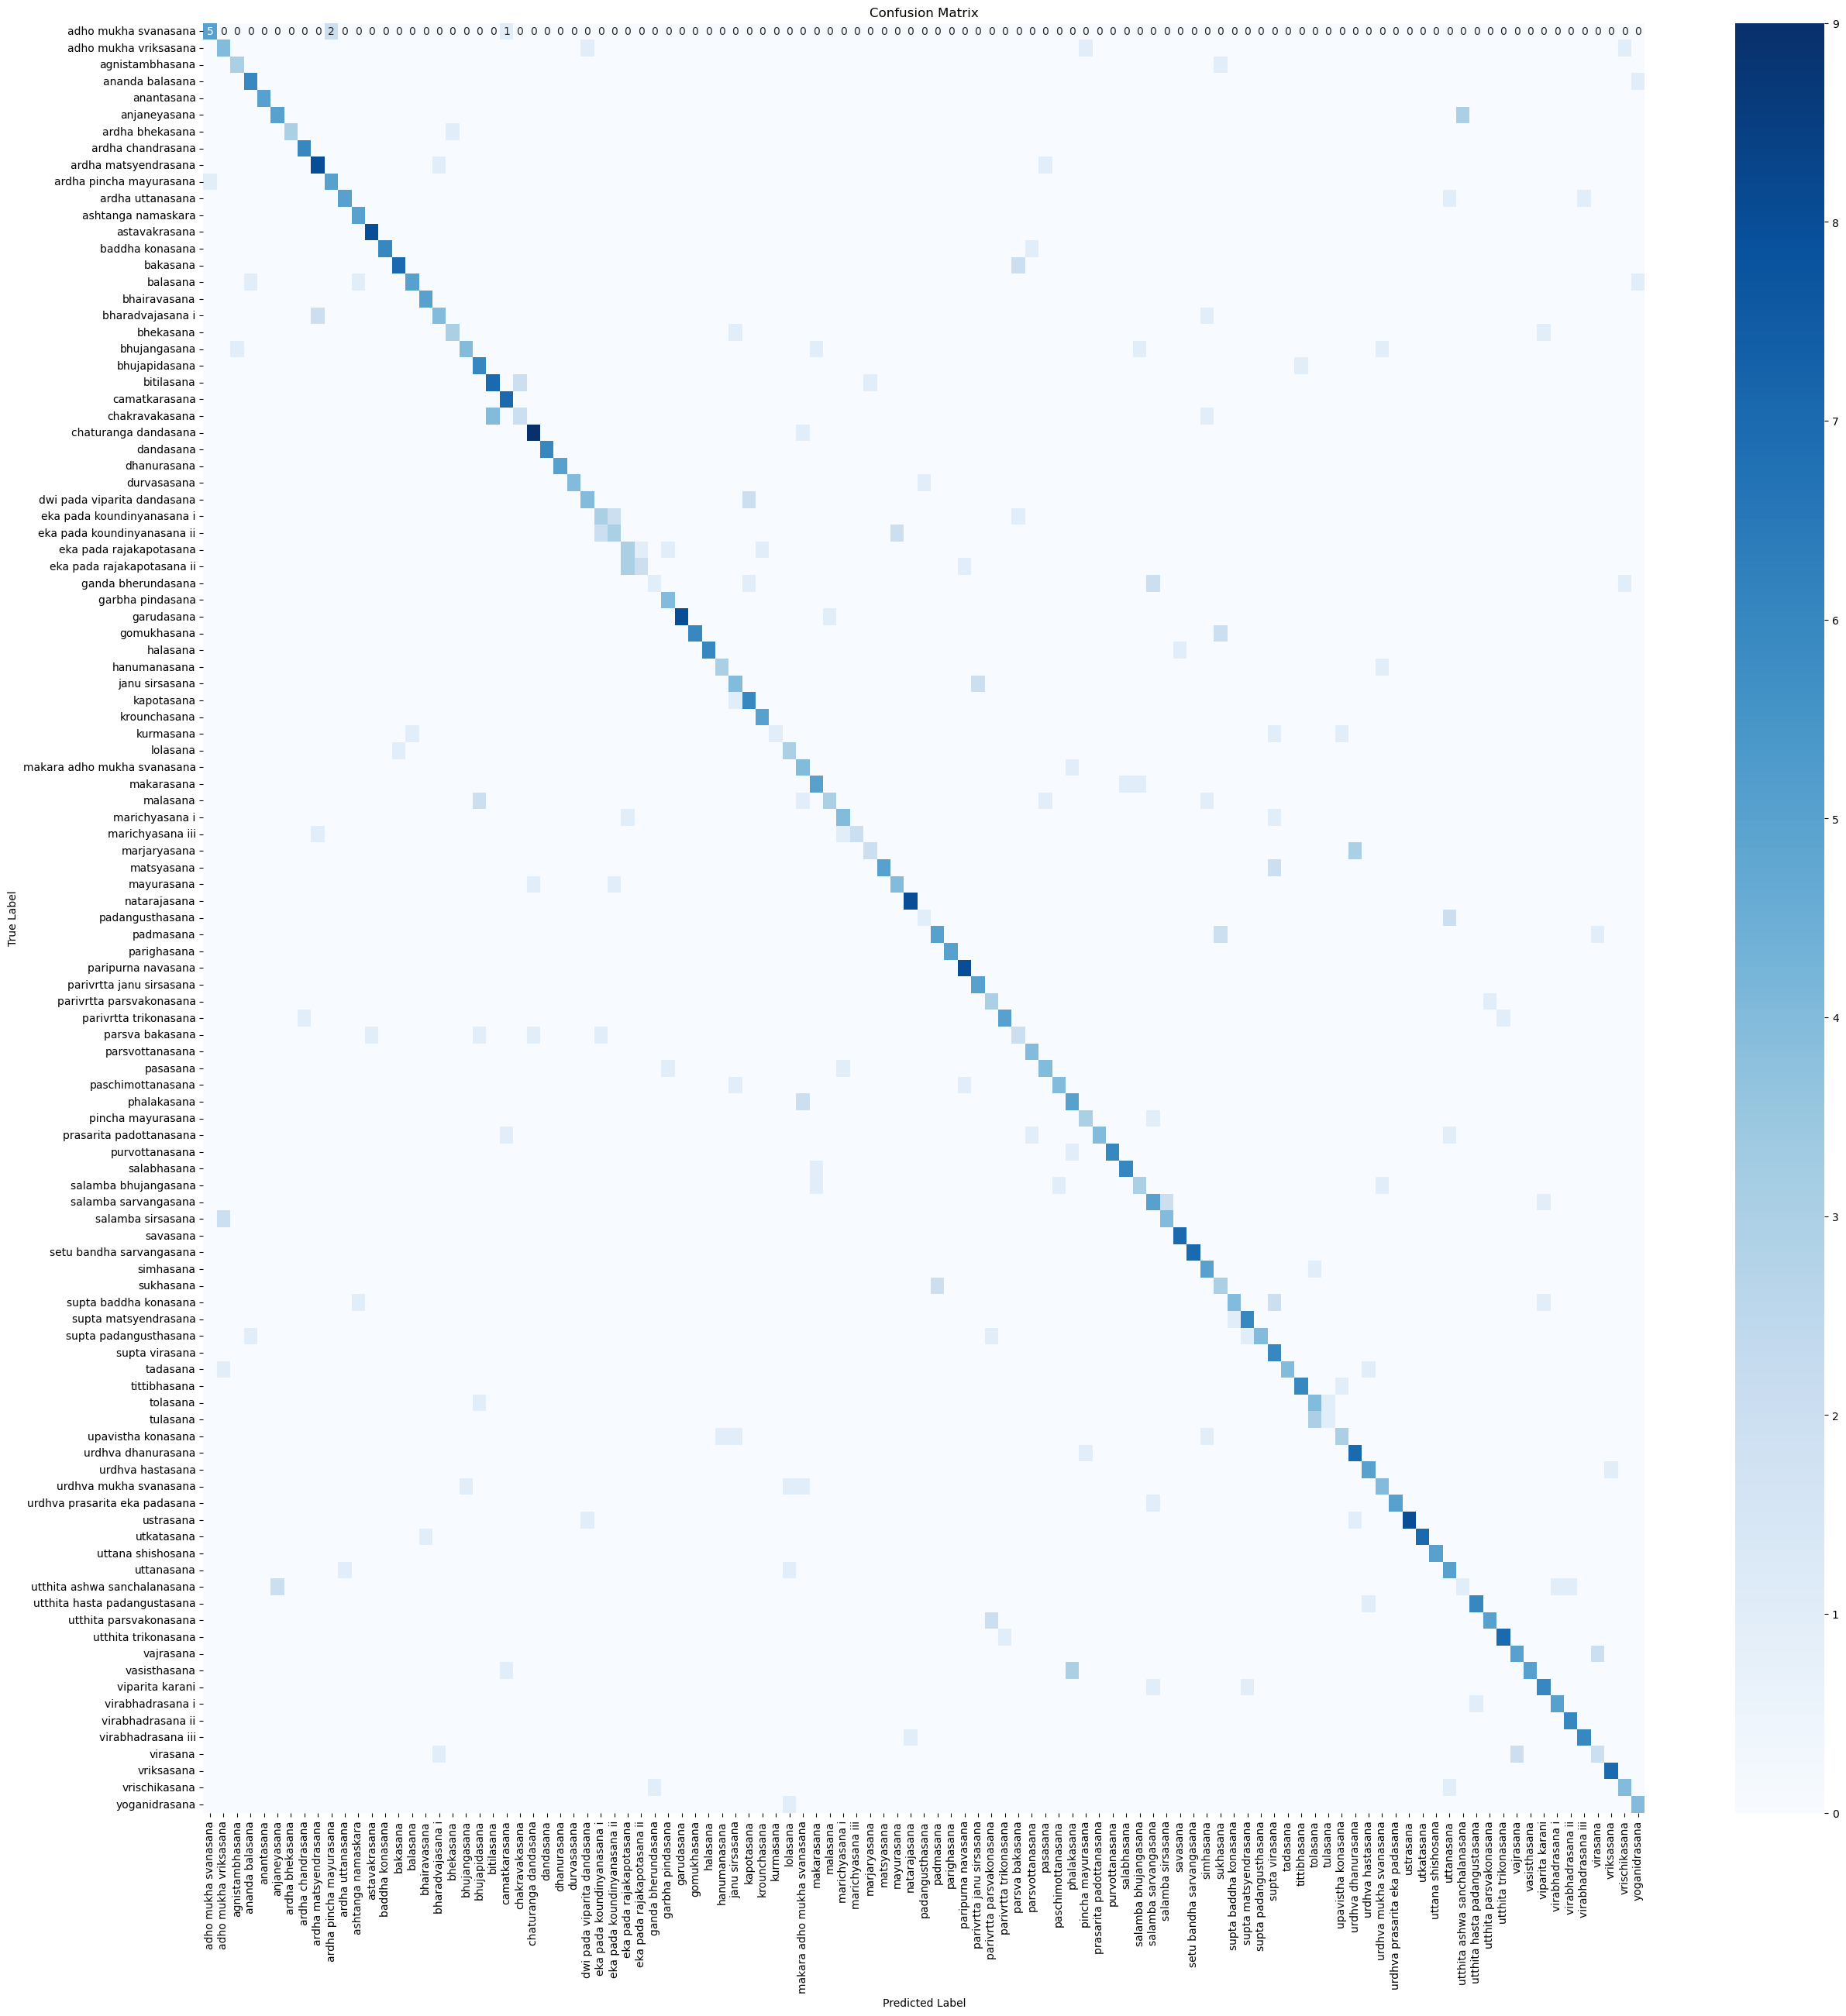

In [76]:
# Save the fine-tuned model
model_fine_tuned.save("yoga_pose_cnn_model_fine_tuned.h5")
print("Fine-tuned model saved to disk.")

# Display model architecture
model_fine_tuned.summary()

# Function to predict with the ensemble of models
def ensemble_predict(models, data_generator):
    predictions = [model.predict(data_generator, steps=len(data_generator), verbose=1) for model in models]
    avg_predictions = np.mean(predictions, axis=0)
    return np.argmax(avg_predictions, axis=1)

# Get true labels
y_true = test_generator.classes

# Ensemble prediction
models = [model_fine_tuned]  # Add other models if needed for ensemble
y_pred = ensemble_predict(models, test_generator)

# Compute and print evaluation metrics
ensemble_accuracy = accuracy_score(y_true, y_pred)
print(f'Ensemble Test Accuracy: {ensemble_accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

# Compute the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(30, 30))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_generator.class_indices.keys()), yticklabels=list(test_generator.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Transfer Learning

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Set directories for training, validation, and testing data
train_dir = r"C:\Users\masfa\Desktop\107 yoga poses\train"
val_dir = r"C:\Users\masfa\Desktop\107 yoga poses\val"
test_dir = r"C:\Users\masfa\Desktop\107 yoga poses\test"

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Data augmentation and normalization for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation and testing
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4147 images belonging to 107 classes.
Found 1157 images belonging to 107 classes.
Found 687 images belonging to 107 classes.


In [2]:
# Choose the model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers except the last few
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Add custom layers on top of the pre-trained base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step


In [3]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=50  # Increase epochs as needed
)


Epoch 1/50


c:\Users\masfa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 37/129 ━━━━━━━━━━━━━━━━━━━━ 6:59 5s/step - accuracy: 0.0055 - loss: 4.7126

c:\Users\masfa\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 495s 4s/step - accuracy: 0.0155 - loss: 4.6669 - val_accuracy: 0.0460 - val_loss: 4.2782
Epoch 2/50
  1/129 ━━━━━━━━━━━━━━━━━━━━ 5:27 3s/step - accuracy: 0.0000e+00 - loss: 4.5849

c:\Users\masfa\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: 4.5849 - val_accuracy: 0.0000e+00 - val_loss: 4.5911
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 405s 3s/step - accuracy: 0.0612 - loss: 4.1473 - val_accuracy: 0.1571 - val_loss: 3.4365
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0938 - loss: 3.5137 - val_accuracy: 0.2000 - val_loss: 3.3347
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 398s 3s/step - accuracy: 0.1452 - loss: 3.4993 - val_accuracy: 0.2205 - val_loss: 2.9366
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2188 - loss: 3.0770 - val_accuracy: 0.0000e+00 - val_loss: 3.5317
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 394s 3s/step - accuracy: 0.2264 - loss: 3.0406 - val_accuracy: 0.3194 - val_loss: 2.6010
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1875 - loss: 2.5459 - val_accuracy: 0.0000e+00 - val_loss: 1.9579
Epoch 9/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 399s 3s/step - accuracy: 0.2906 - loss: 2.6880 - val_acc

In [4]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {accuracy:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 166s 8s/step - accuracy: 0.6374 - loss: 1.5124
Test Accuracy: 0.6071


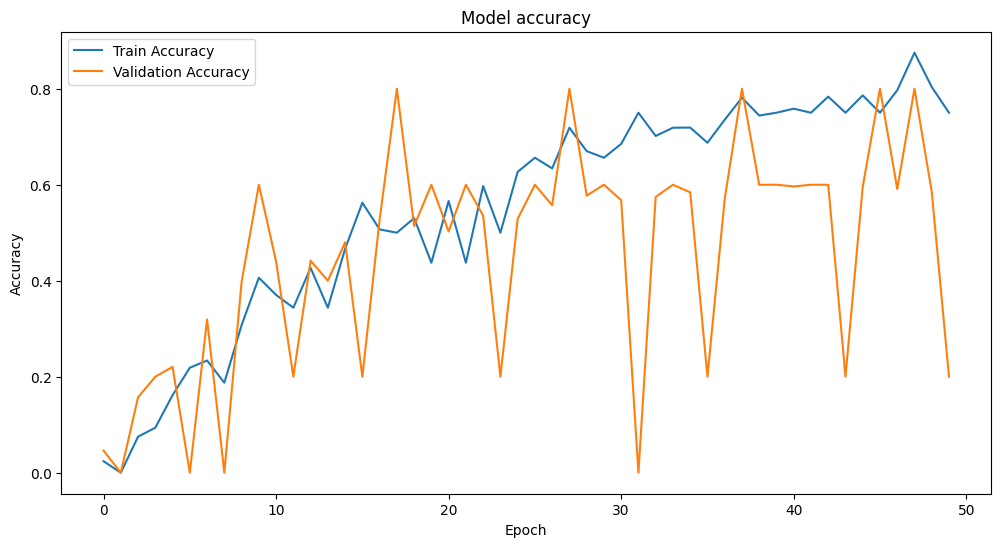

In [5]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

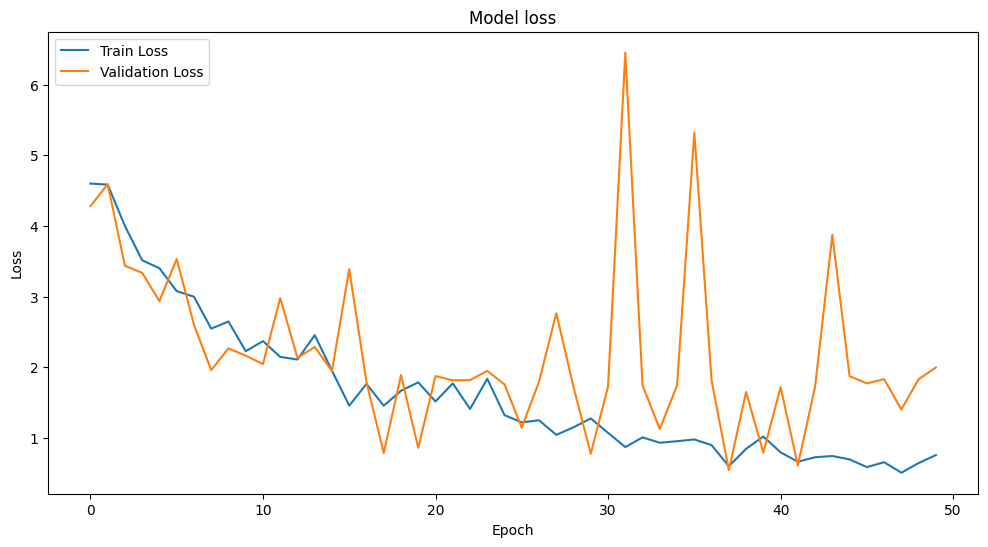

In [6]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [18]:
pip install umap-learn

   ---------------------------------------- 0.0/85.7 kB ? eta -:--:--
   ------------------- -------------------- 41.0/85.7 kB 960.0 kB/s eta 0:00:01
   ------------------- -------------------- 41.0/85.7 kB 960.0 kB/s eta 0:00:01
   ------------------- -------------------- 41.0/85.7 kB 960.0 kB/s eta 0:00:01
   ---------------------------------------- 85.7/85.7 kB 438.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/56.9 kB ? eta -:--:--
   ---------------------------------------- 56.9/56.9 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Unsupervised Segmemtation

Found 5991 images belonging to 107 classes.


c:\Users\masfa\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\masfa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


187/187 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step
Extracted features shape: (5984, 7, 7, 512)
Flattened features shape: (5984, 25088)
PCA reduced features shape: (5984, 50)


c:\Users\masfa\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP reduced features shape: (5984, 2)
Number of clusters: 2
Silhouette Score: 0.0553


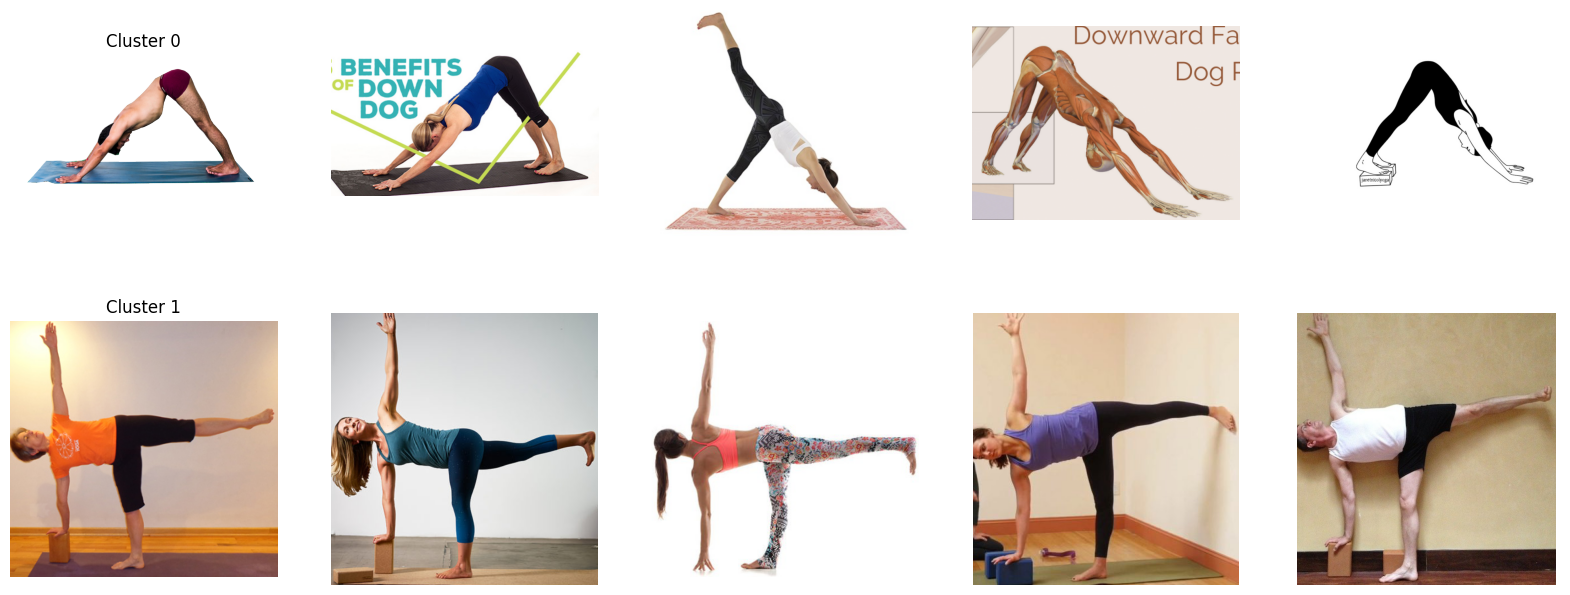

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
import umap
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import os

# Set directories for the data
data_dir = r"C:\Users\masfa\Desktop\data"  # Combine train, val, and test for unsupervised learning

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Only rescaling for feature extraction
datagen = ImageDataGenerator(rescale=1./255)

# Create data generator
data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode=None,  # No labels needed for feature extraction
    shuffle=False
)

# Load the pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a model to extract features
model = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features
features = model.predict(data_generator, steps=data_generator.samples // batch_size, verbose=1)
print(f'Extracted features shape: {features.shape}')

# Flatten the feature vectors
flat_features = features.reshape(features.shape[0], -1)
print(f'Flattened features shape: {flat_features.shape}')

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Reduce to 50 dimensions
pca_features = pca.fit_transform(flat_features)
print(f'PCA reduced features shape: {pca_features.shape}')

# Apply UMAP for dimensionality reduction
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_features = umap_reducer.fit_transform(pca_features)
print(f'UMAP reduced features shape: {umap_features.shape}')

# Apply DBSCAN clustering on UMAP reduced features
dbscan = DBSCAN(eps=1.0, min_samples=10)  # Adjust eps and min_samples as needed
dbscan.fit(umap_features)

# Get cluster labels
cluster_labels = dbscan.labels_

# Check if there are multiple clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f'Number of clusters: {n_clusters}')

if n_clusters > 1:
    # Calculate silhouette score
    silhouette_avg = silhouette_score(umap_features, cluster_labels)
    print(f'Silhouette Score: {silhouette_avg:.4f}')

    # Define a function to plot images from each cluster
    def plot_cluster_images(data_generator, cluster_labels, num_clusters, num_images=5):
        plt.figure(figsize=(20, num_clusters * 4))
        for cluster in range(num_clusters):
            cluster_indices = np.where(cluster_labels == cluster)[0]
            cluster_images = cluster_indices[:num_images]
            for i, img_index in enumerate(cluster_images):
                img_path = data_generator.filepaths[img_index]
                img = plt.imread(img_path)
                plt.subplot(num_clusters, num_images, cluster * num_images + i + 1)
                plt.imshow(img)
                plt.axis('off')
                if i == 0:
                    plt.title(f'Cluster {cluster}')
        plt.show()

    # Get the unique cluster labels
    unique_clusters = np.unique(cluster_labels)

    # Plot images from clusters
    plot_cluster_images(data_generator, cluster_labels, len(unique_clusters))
else:
    print("DBSCAN did not find multiple clusters. Try adjusting the parameters.")


Pose Estimation Model from given lists of models

In [138]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard

In [51]:
# Function to detect pose keypoints using MoveNet model
def detect_pose(image, model):
    input_image = tf.image.resize(image, (192, 192))
    input_image = tf.expand_dims(input_image, axis=0)
    input_image = tf.cast(input_image, dtype=tf.int32)
    
    # Run model inference
    outputs = model.signatures["serving_default"](input_image)
    keypoints = outputs['output_0'][0]
    
    return keypoints

In [52]:
# Function to extract features from a directory of images
def extract_features_from_directory(directory, model):
    feature_vectors = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for img_name in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_name)
                img = cv2.imread(img_path)
                if img is None:
                    print(f"Warning: Unable to read image {img_path}")
                    continue
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                keypoints = detect_pose(img_rgb, model)
                feature_vectors.append(keypoints.numpy().flatten())
                labels.append(label)
    return np.array(feature_vectors), np.array(labels)

In [53]:
# Paths to dataset directories
train_dir = r"C:\\Users\\masfa\\Desktop\\107 yoga poses\\train"
test_dir = r"C:\\Users\\masfa\\Desktop\\107 yoga poses\\test"
val_dir = r"C:\\Users\\masfa\\Desktop\\107 yoga poses\\val"

In [54]:
# Load the pose estimation model from a local path
pose_model = tf.saved_model.load(r"C:\\Users\\masfa\\Downloads\\movenet-tensorflow2-singlepose-lightning-v4")

In [55]:
# Extract features and labels
X_train, y_train = extract_features_from_directory(train_dir, pose_model)
X_test, y_test = extract_features_from_directory(test_dir, pose_model)
X_val, y_val = extract_features_from_directory(val_dir, pose_model)

In [116]:
# Normalize the keypoints
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)
X_val = (X_val - np.mean(X_val, axis=0)) / np.std(X_val, axis=0)

In [59]:
# Convert labels to numeric values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)

In [139]:
# Build an enhanced classification model
model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax')
])

In [140]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [141]:
# Callbacks
early_stopping = EarlyStopping(patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(patience=10)
tensorboard = TensorBoard(log_dir='./logs')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr, tensorboard])

In [122]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr, tensorboard])


Epoch 1/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.0165 - loss: 4.9801 - val_accuracy: 0.1495 - val_loss: 3.9317 - learning_rate: 0.0010
Epoch 2/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0770 - loss: 4.1509 - val_accuracy: 0.2697 - val_loss: 3.3012 - learning_rate: 0.0010
Epoch 3/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1367 - loss: 3.6799 - val_accuracy: 0.3310 - val_loss: 2.9144 - learning_rate: 0.0010
Epoch 4/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1650 - loss: 3.3489 - val_accuracy: 0.3717 - val_loss: 2.6695 - learning_rate: 0.0010
Epoch 5/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1935 - loss: 3.1629 - val_accuracy: 0.3915 - val_loss: 2.5034 - learning_rate: 0.0010
Epoch 6/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2362 - loss: 2.9842 - val_accuracy: 0.4417 - val_loss: 2.3501 - learning_rate: 0.0010
Epoch 7/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2565 - l

In [123]:
# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [124]:
# Print the results
print('Accuracy:', accuracy)
print('Classification Report:', report)

Accuracy: 0.5807860262008734
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.10      0.14      0.12         7
           2       0.33      0.25      0.29         4
           3       0.70      1.00      0.82         7
           4       0.50      1.00      0.67         5
           5       0.50      0.38      0.43         8
           6       0.67      0.50      0.57         4
           7       0.80      0.67      0.73         6
           8       0.56      0.90      0.69        10
           9       0.86      1.00      0.92         6
          10       0.56      0.71      0.62         7
          11       0.00      0.00      0.00         5
          12       0.62      1.00      0.76         8
          13       0.88      1.00      0.93         7
          14       0.78      0.78      0.78         9
          15       0.60      0.38      0.46         8
          16       0.67      

In [125]:
# Save the model
model.save('pose_classification_model_with_keypoints.h5')

In [126]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()